In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt
from scipy import stats

In [17]:
with open(r'../../data/tidy/Shrewsbury_join_tidy_CLAY.csv') as Shrewsbury_CLAY:
    df_Shrewsbury_CLAY=pd.read_csv(Shrewsbury_CLAY)

C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (24,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


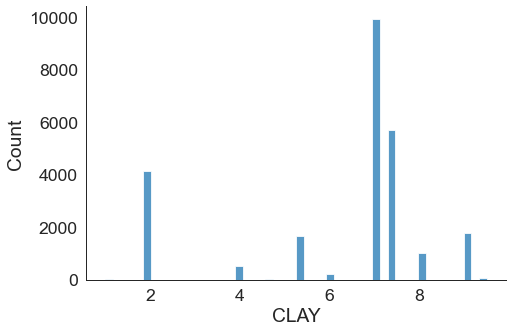

In [18]:
# plotting histogram for CLAY
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_Shrewsbury_CLAY, x="CLAY", kind="hist", bins = 50, aspect = 1.5)

<function matplotlib.pyplot.show(close=None, block=None)>

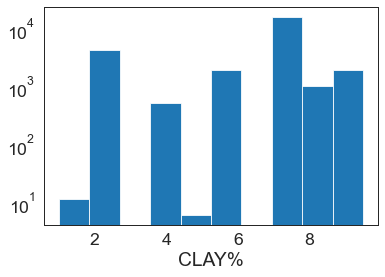

In [19]:
# plotting histogram for CLAY
plt.hist(df_Shrewsbury_CLAY['CLAY'], log=True)
plt.xlabel('CLAY%')
plt.show

In [20]:
df_Shrewsbury_CLAY['log_CLAY'] = np.log10(df_Shrewsbury_CLAY['CLAY'])

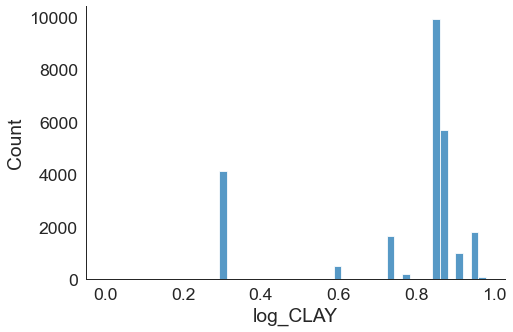

In [21]:
# plotting histogram for CLAY
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_Shrewsbury_CLAY, x="log_CLAY", kind="hist", bins = 50, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
norm,2437.467313,216.692026,-5.808449e+04,inf
gamma,inf,inf,inf,inf
lognorm,inf,inf,inf,inf
beta,inf,inf,inf,inf
burr,inf,inf,inf,inf


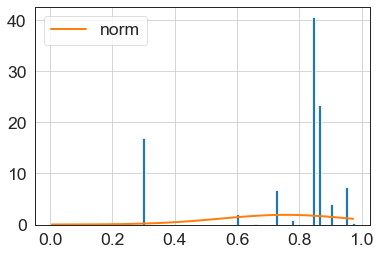

In [23]:
CLAY=df_Shrewsbury_CLAY['log_CLAY'].values
f = Fitter(CLAY,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
cauchy,1594.758752,519.340531,-68678.538192,inf
laplace,2219.840208,350.321443,-60419.979575,inf
gumbel_l,2326.832135,259.693842,-59244.484389,inf
hypsecant,2338.559014,325.894085,-59118.945404,inf
logistic,2380.901340,287.117824,-58670.842926,inf


C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


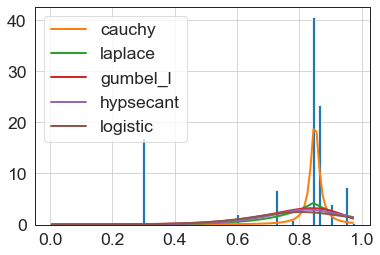

In [24]:
CLAY=df_Shrewsbury_CLAY['log_CLAY'].values
f = Fitter(CLAY)
f.fit()
f.summary()

In [ ]:
log_CLAY=df_Shrewsbury_CLAY['log_CLAY'].values
f = Fitter(log_CLAY,
           distributions=['cauchy',
                          'chi2',
                          'expon',
                          'exponpow',
                          'gamma',
                          'lognorm',
                          'norm',
                          'powerlaw',
                          'rayleigh',
                          'uniform',
                          'logistic'])
f.fit()
f.summary()

In [26]:
# We can see that the burr distribution is the best fit based on the sumsquare_error criteria.

In [27]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.7566765898579608, 'scale': 0.21097045056949185}}

In [32]:
f.fitted_param['cauchy']

KeyError: 'cauchy'

,sumsquare_error,aic,bic,kl_div
norm,2437.467313,216.692026,-5.808449e+04,inf
gamma,inf,inf,inf,inf
lognorm,inf,inf,inf,inf
burr,inf,inf,inf,inf
beta,inf,inf,inf,inf


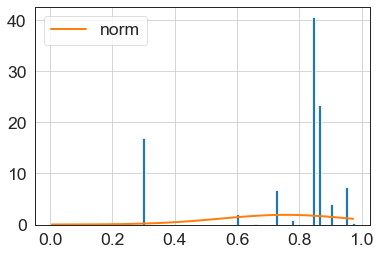

In [30]:
f = Fitter(log_CLAY,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()